# The Schechter Function

The Schechter function (Schechter 1975) is an analytic expression for the luminosity of galaxies which can be written as follows:

$$\phi(L) = \left( \frac{\phi^*}{L^*} \right) \left( \frac{L}{L^*} \right)^\alpha \exp{\left( -\frac{L}{L^*} \right)}$$

This function essentially describes the number of galaxies in the given range of luminosity $L$ to $L+dL$. It is evident from the above equation that it is a three parameter function with parameters $\phi^*$, $L^*$ and $\alpha$. Here, $\alpha$ represents the power-law parameter for the faint-end and $L^*$ is the characteristic luminosity, while $\phi*$ serves as the normalisation constant.

The aforementioned Schechter function is the function of the luminosities, but in practice, one can tranlate the function into the function of the absolute magnitude of the galaxies. Such function can be written as,

$$ \phi(M) = 0.921 \phi^* 10^{0.4(\alpha + 1)(M^* - M)} \exp{\left( -10^{0.4(M^* - M)} \right)}$$

Here, $M$ and $M^*$ represents the absolute magnitude and the characteristic absolute magnitude respectively.

Below we try to write a simple python function to calculate both of the versions of the Schechter function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import utils as utl

In [2]:
def schechter(lum, phi1, lum1, alpha):
    """
    The Schechter Function
    ----------------------
    Paramters:
    ----------
    lum : float, numpy.ndarray
        input luminosities of the galaxies
    phi1 : float
        normalisation constant
    lum1 : float
        characteristic luminosity
        the 'knee' of the function
    alpha : float
        the faint-end slope of power-law function
    ----------
    returns:
    ----------
    float or numpy.ndarray
        number of galaxies in given luminosity range
    """
    ab = phi1/lum1
    cd = (lum/lum1)**alpha
    expp = np.exp(-(lum/lum1))
    xy = ab*cd*expp
    return xy

def schechter_mag(M, phi1, m1, alpha):
    """
    The Schechter Function
    as described above.
    -------------------
    Parameters:
    -----------
    M : float, or numpy.ndarray
        absolute magnitude of the galaxies
    phi1 : float
        normalisation constant
    m1 : float
        the characteristic absolute magnitude
    alpha : float
        the faint-end slope of power-law function
    -----------
    returns
    -----------
    float or numpy.ndarray
        number of galaxies in given absolute magnitude range
    """
    m2 = 0.4*(m1-M)
    ab = 0.921*phi1
    cd = 10**(m2*(alpha+1))
    ef = np.exp(-10**m2)
    xxy = ab*cd*ef
    return xxy

### The logarithmic Schechter Function

It is a general practice to use logarithmic units in the Schechter function, which can be converted easily and can be written as following,

$$\phi(\log L) = \ln 10 \phi^* 10^{(\alpha + 1)(\log L - \log L^*)} \exp{\left( -10^{\log L - \log L^*} \right)}$$

The constant parameters have their usual meanings.

Below, we try to define such Schechter function.

In [3]:
def log_schechter(lum, lum1, phi1, alpha):
    """
    The Normalised logarithmic Schechter Function
    ---------------------------------------------
    Parameters:
    -----------
    lum : float, numpy.ndarray
        luminosity range
    phi1 : float
        normalisation constant
    lum1 : float
        characteristic luminosity
        the 'knee' of the function
    alpha : float
        the faint-end slope of power law
    -----------
    return
    -----------
    float, numpy.ndarray
        number of galaxies in given bin
    """
    logg = np.log10(lum) - np.log10(lum1)
    ab = np.log(10)*phi1
    bc = 10**((alpha+1)*logg)
    cd = np.exp(-10**logg)
    return ab*bc*cd

Below, we try to reproduce Figure 1 from Bouwens et al. (2012), which shows the various Schechter functions for various parameters. They repeat the procedure for several redshifts, but, for the sake of simplicity, we first try to calculate the Schechter function for just one redshift $z \sim 4$. The parameters that we use to plot the function are, $M^* = -20.98$, $\phi^* = 1.3\times 10^{-3}$ and $\alpha = -1.73$.

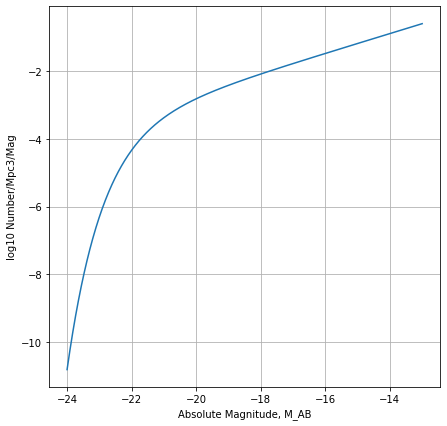

In [4]:
m1 = -20.98
ph1 = 1.3e-3
al1 = -1.73

mags = np.linspace(-24, -13, 1000)

nos = schechter_mag(M=mags, phi1=ph1, alpha=al1, m1=m1)
log_nos = np.log10(nos)

plt.figure(figsize=(7,7))
plt.plot(mags, log_nos)
plt.xlabel('Absolute Magnitude, M_AB')
plt.ylabel('log10 Number/Mpc3/Mag')
plt.grid()

It seems to agree very well with the Figure 1 of the Bouwens et al. (2012). We can now make the same function for various redshifts. Below we state the values for Schechter Parameters for various redshifts:

- For $z\sim 4$: $M^*=-20.98$, $\phi^*=1.3 \times 10^{-3}$, $\alpha=-1.73$
- For $z\sim 5$: $M^*=-20.60$, $\phi^*=1.4 \times 10^{-3}$, $\alpha=-1.79$
- For $z\sim 6$: $M^*=-20.37$, $\phi^*=1.4 \times 10^{-3}$, $\alpha=-1.73$
- For $z\sim 7$: $M^*=-20.14$, $\phi^*=0.86 \times 10^{-3}$, $\alpha=-2.01$
- For $z\sim 8$: $M^*=-20.10$, $\phi^*=0.59 \times 10^{-3}$, $\alpha=-1.91$

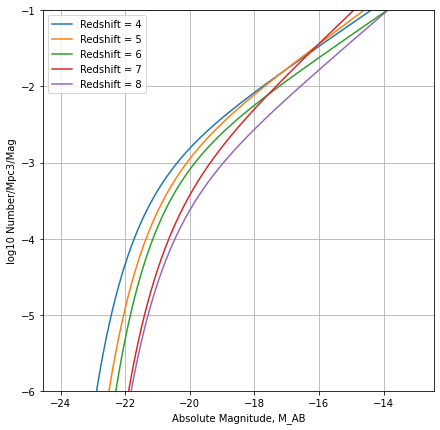

In [5]:
ms = np.array([-20.98, -20.60, -20.37, -20.14, -20.10])
phis = np.array([1.3, 1.4, 1.4, 0.86, 0.59])*1e-3
als = np.array([-1.73, -1.79, -1.73, -2.01, -1.91])

zs = np.array([4,5,6,7,8])

plt.figure(figsize=(7,7))
for i in range(len(zs)):
    nos2 = schechter_mag(mags, m1=ms[i], alpha=als[i], phi1=phis[i])
    nos3 = np.log10(nos2)
    plt.plot(mags, nos3, label='Redshift = ' + str(zs[i]))

plt.xlabel('Absolute Magnitude, M_AB')
plt.ylabel('log10 Number/Mpc3/Mag')
plt.ylim([-6,-1])
plt.legend(loc='best')
plt.grid()

Above figure shows the number of galaxies in the bins of absolute magnitude in a given comoving volume of a unit Mpc at various redshifts. We also want to check the $\alpha$ dependency on the Schechter function. To do this, we plot the Schechter functions for given redshift (values for $M^* = -20.98$ and $\phi^*=1.3\times 10^{-3}$ taken from Bouwens et al. 2012) for different values of $\alpha$ ranging from $-1$ to $-2$.

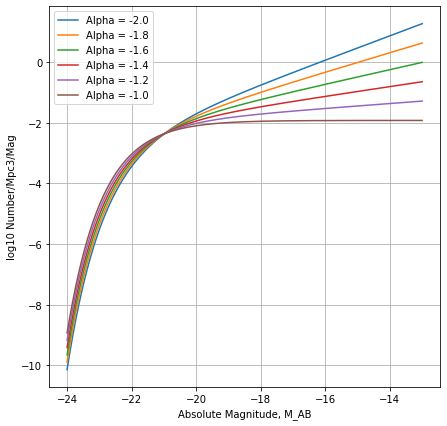

In [6]:
als2 = np.array([-2.0, -1.8, -1.6, -1.4, -1.2, -1.0])
phi2 = 1.3*10e-3
m2 = -20.98

plt.figure(figsize=(7,7))

for j in range(len(als2)):
    nos2 = schechter_mag(mags, m1=m2, alpha=als2[j], phi1=phi2)
    nos3 = np.log10(nos2)
    plt.plot(mags, nos3, label='Alpha = ' + str(als2[j]))

plt.xlabel('Absolute Magnitude, M_AB')
plt.ylabel('log10 Number/Mpc3/Mag')
#plt.ylim([-6,-1])
plt.legend(loc='best')
plt.grid()

It is clear from above figure that as the slope of the faint end of the power law of the Schechter function become steeper, i.e., as the value of $\alpha$ become more negative (from $-1$ to $-2$), the number of the fainter galaxies per bin of absolute magnitude increases. Meaning that the contribution of fainter galaxies to the luminosity density would increases accordingly, as we shown below.

We further want to find the contribution of luminosity density per dex for different value of the parameter alpha. To do this, we plot the Schechter function per logarithmic bins of luminosity as a function of luminosity. We use the values from Bouwens et al. (2012) at redshift 4 ($M^*=-20.98$ and $\phi^*=1.3 \times 10^{-3}$) at various values of $\alpha$ ($\alpha=-1$, $-1.7$ and $-2.0$)to compute the luminosity function.

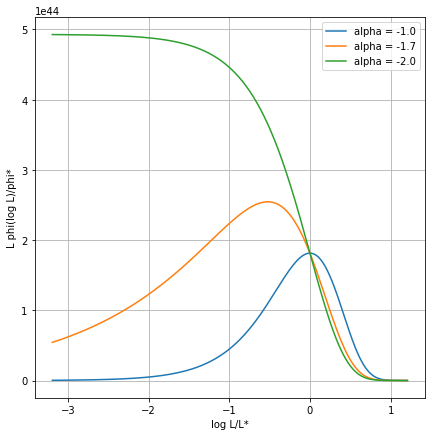

In [8]:
als1 = np.array([-1, -1.7, -2])
lums = utl.m_to_l_wave(mags, 1500)
lums1 = utl.m_to_l_wave(-20.98, 1500)
phi11 = 1.3*10e-3

plt.figure(figsize=(7,7))

for i in range(len(als1)):
    nos1 = log_schechter(lums, lum1=lums1, phi1 = phi11, alpha=als1[i])
    nos11 = lums*nos1/phi11
    xx = np.log10(lums/lums1)
    plt.plot(xx, nos11, label='alpha = ' + str(als1[i]))

plt.xlabel('log L/L*')
plt.ylabel('L phi(log L)/phi*')
plt.legend(loc='best')
plt.grid()

Above figure shows the luminosity functions for different $\alpha$ values (which represents the power-law slope of the Schechter function at the faint end) -- integration of this function would give us the total luminosity density. It can be seen from the above plot that for steeper faint-end slope (i.e., more negative value of $\alpha$), the contribution of fainter galaxies to the luminosity density increases rapidly.

## Luminosity Density

We now want to integrate luminosity function to find the luminosity density as follows:

$$\rho(>L_{min}) = \int_{L_{min}}^\infty L \phi(L) dL$$

Below, we first calculate the luminosity density for one value of $\alpha$ and then try to reproduce the similar results with different values of $\alpha$. As usual, we follow Bouwens et al. 2012 for values of $M^*$ ($=-20.98$) and $\phi^*$ ($=1.3\times 10^{-3}$) at redshift $4$.

/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:376: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:378: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


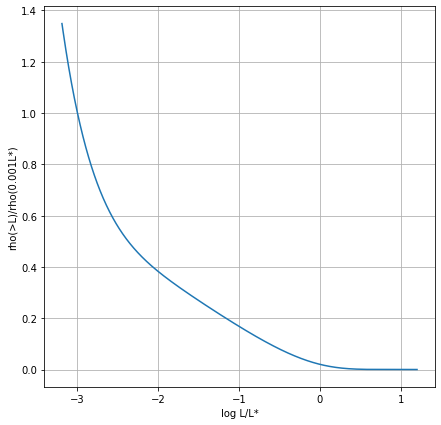

In [9]:
# Range of luminosities for integration is related to absolute magnitudes [-23,-16]
# Corresponding valriable is lums defined earlier
#
# Characteristic luminosiy is correspond to the characteristic magnitude M* = -20.98
# Variable is lums1
#
# phi* ~ phi11

# To Calculate rho(0.001L*)
nor_xx = np.linspace(0.001*lums1, lums[0], 1000)
nor_sc1 = schechter(nor_xx, lum1=lums1, phi1=phi11, alpha=-2)
nor_sc = nor_xx*nor_sc1/phi11
rho_nor = inte.simps(nor_sc, nor_xx)

#
lum_den1 = np.array([])

for i in range(len(lums)):
    xx = np.linspace(lums[i], lums[0], 1000)
    nos_1 = schechter(xx, lum1=lums1, phi1=phi11, alpha=-2)
    nos_2 = xx*nos_1/phi11
    ints2 = inte.simps(nos_2, xx)
    lum_den1 = np.hstack((lum_den1, ints2))

x_ax = np.log10(lums/lums1)
lum_den = lum_den1/rho_nor

plt.figure(figsize=(7,7))
plt.plot(x_ax, lum_den)
plt.xlabel('log L/L*')
plt.ylabel('rho(>L)/rho(0.001L*)')
plt.grid()

It seems to be working properly. Let's now plot the same function for different values of $\alpha$.

/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:376: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:378: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:376: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:378: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:376: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/home/jayshil/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadrature.py:378: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum

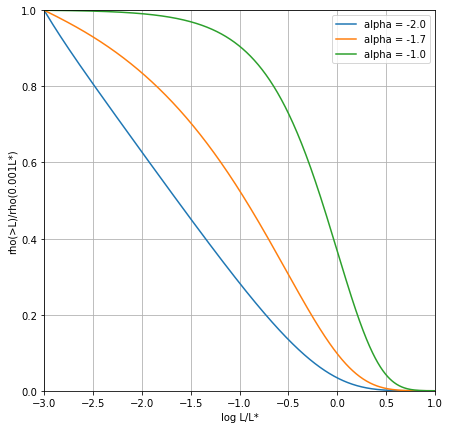

In [10]:
alp = np.array([-2, -1.7, -1])

plt.figure(figsize=(7,7))

for j in range(len(alp)):
    # To Calculate rho(0.001L*)
    nor_xx = np.linspace(0.001*lums1, lums[0], 10000)
    nor_sc1 = schechter(nor_xx, lum1=lums1, phi1=phi11, alpha=alp[j])
    nor_sc = nor_xx*nor_sc1/phi11
    rho_nor = inte.simps(nor_sc, nor_xx)
    # To calculate integration
    lum_den1 = np.array([])
    for i in range(len(lums)):
        xx = np.linspace(lums[i], lums[0], 10000)
        nos_1 = schechter(xx, lum1=lums1, phi1=phi11, alpha=alp[j])
        nos_2 = xx*nos_1/phi11
        ints2 = inte.simps(nos_2, xx)
        lum_den1 = np.hstack((lum_den1, ints2))
    # To plot
    x_ax = np.log10(lums/lums1)
    lum_den = lum_den1/rho_nor
    plt.plot(x_ax, lum_den, label='alpha = ' + str(alp[j]))

plt.xlim([-3,1])
plt.ylim([0,1])
plt.xlabel('log L/L*')
plt.ylabel('rho(>L)/rho(0.001L*)')
plt.legend(loc='best')
plt.grid()

So, it seems that the numerical integration worked properly.